In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
# !pip install Pillow
# from PIL import Image

In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atla

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, dic.obs, obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 9
Rolling mean range: 8


In [8]:
obs.time

<xarray.DataArray 'time' (time: 65)>
array(['1959-12-31T00:00:00.000000000', '1960-12-31T00:00:00.000000000',
       '1961-12-31T00:00:00.000000000', '1962-12-31T00:00:00.000000000',
       '1963-12-31T00:00:00.000000000', '1964-12-31T00:00:00.000000000',
       '1965-12-31T00:00:00.000000000', '1966-12-31T00:00:00.000000000',
       '1967-12-31T00:00:00.000000000', '1968-12-31T00:00:00.000000000',
       '1969-12-31T00:00:00.000000000', '1970-12-31T00:00:00.000000000',
       '1971-12-31T00:00:00.000000000', '1972-12-31T00:00:00.000000000',
       '1973-12-31T00:00:00.000000000', '1974-12-31T00:00:00.000000000',
       '1975-12-31T00:00:00.000000000', '1976-12-31T00:00:00.000000000',
       '1977-12-31T00:00:00.000000000', '1978-12-31T00:00:00.000000000',
       '1979-12-31T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-12-31T00:00:00.000000000', '1982-12-31T00:00:00.000000000',
       '1983-12-31T00:00:00.000000000', '1984-12-31T00:00:00.000000000',
       '1985-12-31T00:00:00.000000000', '1986-12-31T00:00:00.000000000',
       '1987-12-31T00:00:00.000000000', '1988-12-31T00:00:00.000000000',
       '1989-12-31T00:00:00.000000000', '1990-12-31T00:00:00.000000000',
       '1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31

In [9]:
print(obs.values[4,:,:])

[[   2.25317383    0.36157227   -2.83300781 ... -129.70068359
   -96.34936523  -61.98144531]
 [  -2.68701172   -0.87988281   -4.03540039 ... -117.76953125
   -85.53295898  -58.88818359]
 [   2.56298828   -1.1640625    -5.5234375  ...  -89.09838867
   -74.03051758  -57.50170898]
 ...
 [ 148.7043457   157.07348633  179.36303711 ...  192.71435547
   177.53662109  163.25244141]
 [ 192.54394531  206.30102539  209.29174805 ...  225.96923828
   204.97998047  187.66772461]
 [ 188.08544922  221.62915039  243.00097656 ...  251.7097168
   240.54077148  228.15380859]]


In [10]:
variable_data['BCC-CSM2-MR'][0].time

<xarray.DataArray 'time' (time: 54)>
array([cftime.DatetimeNoLeap(1966, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1967, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1968, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1970, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1971, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1972, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1973, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1974, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1975, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1976, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1977, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1978, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1979, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1981, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1982, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1983, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1984, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1985, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1986, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1987, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1988, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1989, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1991, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1992, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1993, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1994, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1996, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1998, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2003, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2004, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2006, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2007, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2008, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2010, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2011, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2012, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2016, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2017, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 8, 1, 

In [11]:
# # # check the values of obs
# obs["var151"]

# # count how many value are NaN
# nan_count = np.isnan(obs["var151"]).sum()

# print(nan_count.values)

# # count how many values are not NaN
# not_nan_count = np.count_nonzero(obs["var151"])

# print(not_nan_count)

# # calculate the percentage of NaN values
# nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# # # print the percentage of NaN values
# # print("Percentage of NaN values in obs: ", nan_percentage)

In [12]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models, variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.469 to 0.625
P-values range from 0.000 to 0.999


In [13]:
# # print the rfield
# # print(rfield)
# # visualise the distribution of r values
# # as a histogram
# plt.hist(rfield, bins=20)

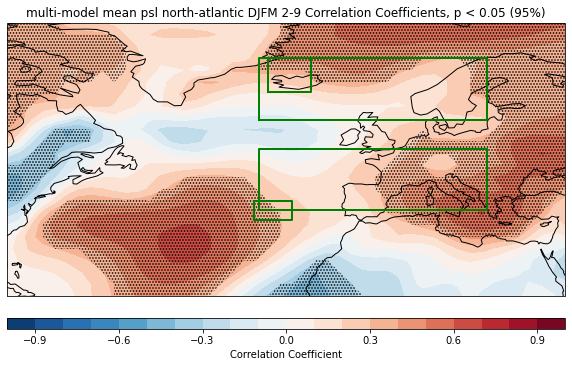

In [14]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.194 to 0.613
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.400 to 0.592
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.567 to 0.587
P-values range from 0.000 to 0.996
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.369 to 0.515
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.541 to 0.464
P-values range from 0.000 to 0.998
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

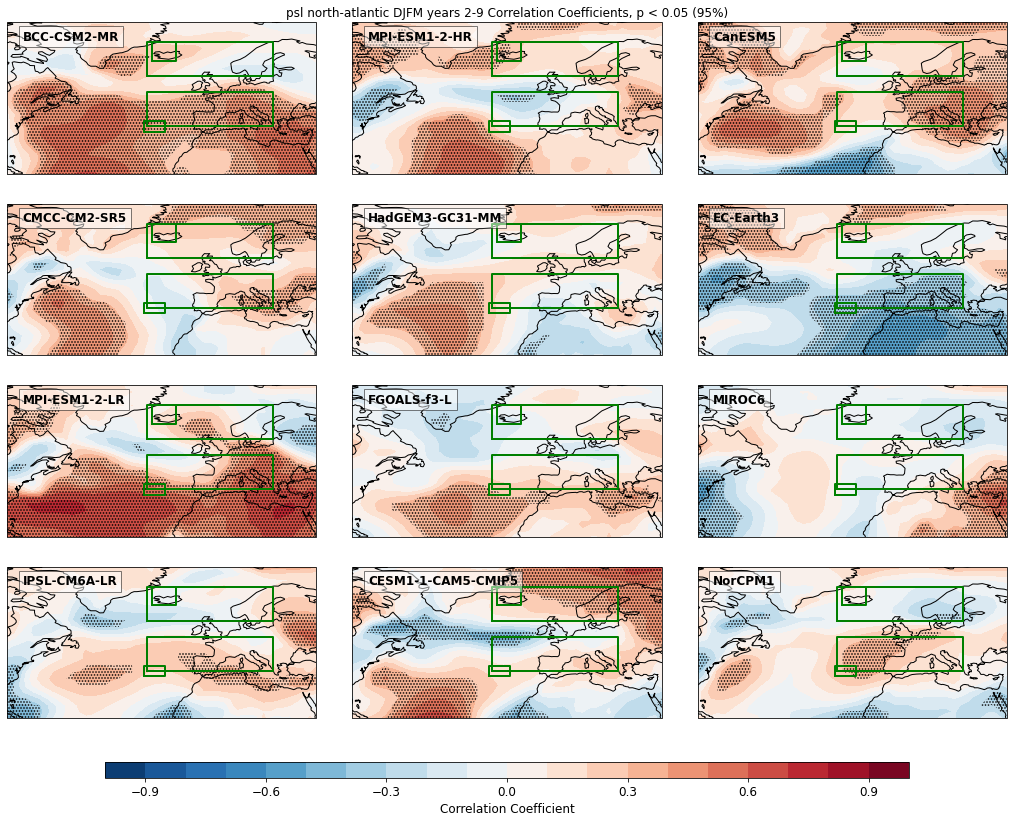

In [15]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [16]:
# Now globally
# Need to process the model data first
region = "global"

In [17]:
# Load the model data
# Now for the global region
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [18]:
# Process the model data
# Again, this is for the global region
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [19]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [20]:
# Process the observations
# For the global region
# # Process the observations
# This function doesn't select the region, so no need to worry about the dic. variable
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, dic.obs, obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 9
Rolling mean range: 8


In [21]:
obs

<xarray.DataArray 'msl' (time: 65, lat: 72, lon: 144)>
dask.array<truediv, shape=(65, 72, 144), dtype=float64, chunksize=(8, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5

In [22]:
# Calculate the r and p fields for the global region
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models, variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.697 to 0.968
P-values range from 0.000 to 0.999


In [23]:
# # Plot the model and obs data to have a look at the data
# fnc.plot_model_data(variable_data, obs, dic.test_model_bcc, dic.gif_plots_dir)

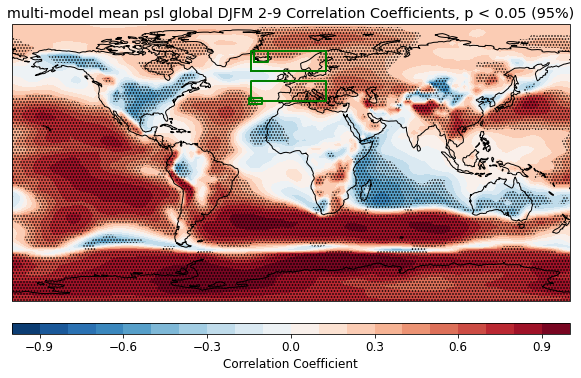

In [24]:
# Plot the global multi-model spatial correlations
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.660 to 0.889
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.771 to 0.947
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.798 to 0.952
P-values range from 0.000 to 0.999
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.575 to 0.902
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.671 to 0.945
P-values range from 0.000 to 0.999
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

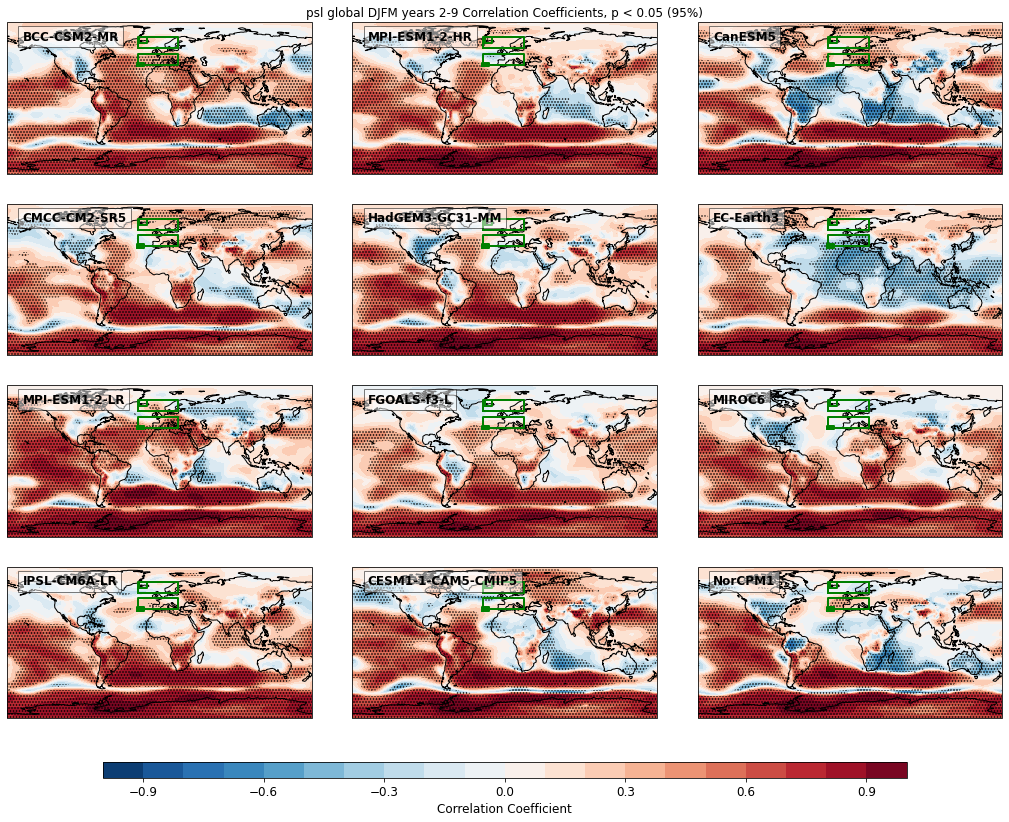

In [25]:
# Now for the global individual model subplots
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [26]:
# Now for the year range 2-5
# Plot the skill for the global region first
# Make sure that the variables are set up correctly
variable = "psl"
region = "global"
season = "DJFM"
forecast_range = "2-5"

In [27]:
# Load the data
# For the global region, years 2-5, DJFM
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-5_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-5_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-5_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-5_DJFM-r8i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-5/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-5_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [28]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [29]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = "psl"
elif variable == "tas":
    obs_var_name = "tas"
elif variable == "sfcWind":
    obs_var_name = "sfcWind"
elif variable == "rsds":
    obs_var_name = "rsds"
else:
    print("Error: variable not found")
    sys.exit()

In [30]:
# Process the observations for the global region and year 2-5 mean
# Check that the output is doing what we expect
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs,
                               forecast_range, season, dic.obs, obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 5
Rolling mean range: 4


In [31]:
# Check that the obs looks like we expect it to
obs

<xarray.DataArray 'msl' (time: 65, lat: 72, lon: 144)>
dask.array<truediv, shape=(65, 72, 144), dtype=float64, chunksize=(4, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5

In [32]:
# Calculate the r and p fields for the global region, year 2-9 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.511 to 0.887
P-values range from 0.000 to 1.000


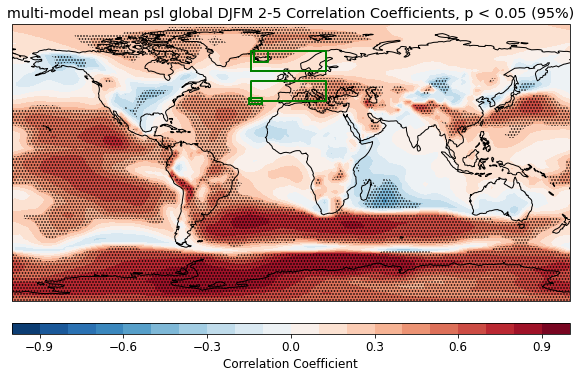

In [33]:
# Plot the correlations for the global region, year 2-9 mean
# Multi-model mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.459 to 0.868
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.565 to 0.837
P-values range from 0.000 to 0.999
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.684 to 0.866
P-values range from 0.000 to 1.000
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.459 to 0.831
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.556 to 0.814
P-values range from 0.000 to 1.000
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

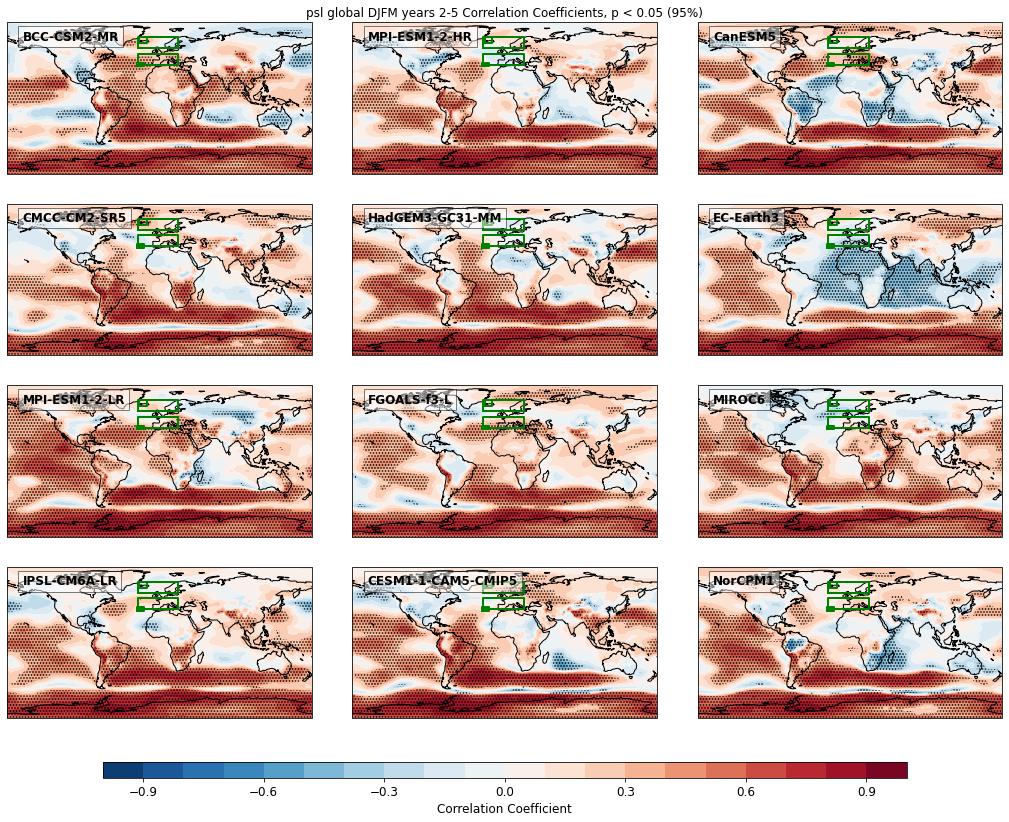

In [34]:
# Now for the individual models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [35]:
# Set up the variables for the obs processing function
# For the new run of the model years 2-3
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-3"
season = "DJFM"
observations_path = dic.obs
obs_var_name = "psl"

In [36]:
# Call the processing obs function
obs = fnc.process_observations(variable, region, region_grid, forecast_range, season, observations_path, obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 3
Rolling mean range: 2


In [37]:
# Have a look at the obs
obs

<xarray.DataArray 'msl' (time: 65, lat: 72, lon: 144)>
dask.array<truediv, shape=(65, 72, 144), dtype=float64, chunksize=(2, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5

In [38]:
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-3_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-3_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-3_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-3_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-3/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-3_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [39]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [40]:
# Calculate the r and p fields for the global region, year 2-3 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.454 to 0.755
P-values range from 0.000 to 1.000


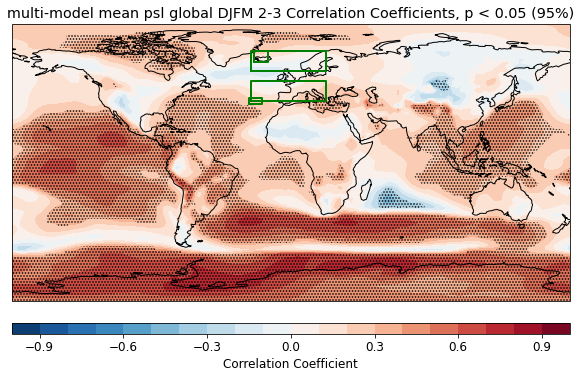

In [41]:
# Plot the correlations for the global region, year 2-3 mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.455 to 0.698
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.503 to 0.715
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.528 to 0.701
P-values range from 0.000 to 1.000
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.382 to 0.759
P-values range from 0.000 to 0.999
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.400 to 0.635
P-values range from 0.000 to 1.000
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

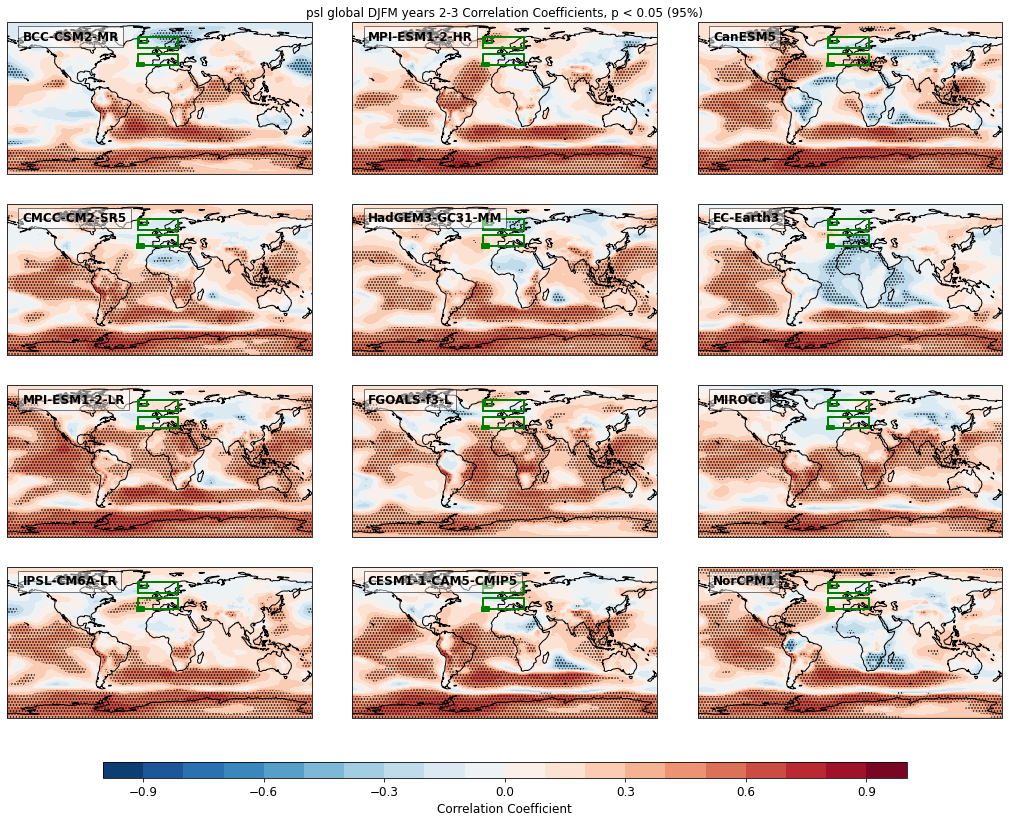

In [42]:
# Now for the individual models for the global region, years 2-3 mean
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [43]:
# Set up the variables for processing the obs
# for the year ahead run of the model years 2-2
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-2"
season = "DJFM"
observations_path = dic.obs
obs_var_name = "psl"

In [44]:
# Call the processing obs function
# for the year ahead 2-2 run
obs = fnc.process_observations(variable, region, region_grid,
                               forecast_range, season, observations_path,
                               obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 2
Rolling mean range: 1


In [45]:
# have a look at the obs
# watch out for the time dimension here - obs years need to line up with the model output
obs.values[1]

array([[-325.12695312, -325.12695312, -325.12695312, ..., -325.12695312,
        -325.12695312, -325.12695312],
       [-312.38476562, -309.72265625, -307.02734375, ..., -324.56835938,
        -320.26171875, -316.05273438],
       [-193.5625    , -190.04492188, -182.32226562, ..., -204.6953125 ,
        -198.52539062, -192.74023438],
       ...,
       [  74.18554688,   74.83398438,   76.75976562, ...,   78.2734375 ,
          75.84960938,   74.50195312],
       [ 246.75195312,  246.59960938,  247.40234375, ...,  250.0859375 ,
         248.421875  ,  246.91992188],
       [ 463.58789062,  463.40820312,  463.61328125, ...,  466.41992188,
         465.35546875,  464.26367188]])

In [46]:
obs.time

<xarray.DataArray 'time' (time: 65)>
array(['1959-12-31T00:00:00.000000000', '1960-12-31T00:00:00.000000000',
       '1961-12-31T00:00:00.000000000', '1962-12-31T00:00:00.000000000',
       '1963-12-31T00:00:00.000000000', '1964-12-31T00:00:00.000000000',
       '1965-12-31T00:00:00.000000000', '1966-12-31T00:00:00.000000000',
       '1967-12-31T00:00:00.000000000', '1968-12-31T00:00:00.000000000',
       '1969-12-31T00:00:00.000000000', '1970-12-31T00:00:00.000000000',
       '1971-12-31T00:00:00.000000000', '1972-12-31T00:00:00.000000000',
       '1973-12-31T00:00:00.000000000', '1974-12-31T00:00:00.000000000',
       '1975-12-31T00:00:00.000000000', '1976-12-31T00:00:00.000000000',
       '1977-12-31T00:00:00.000000000', '1978-12-31T00:00:00.000000000',
       '1979-12-31T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-12-31T00:00:00.000000000', '1982-12-31T00:00:00.000000000',
       '1983-12-31T00:00:00.000000000', '1984-12-31T00:00:00.000000000',
       '1985-12-31T00:00:00.000000000', '1986-12-31T00:00:00.000000000',
       '1987-12-31T00:00:00.000000000', '1988-12-31T00:00:00.000000000',
       '1989-12-31T00:00:00.000000000', '1990-12-31T00:00:00.000000000',
       '1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31

In [47]:
obs.values

array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[-325.12695312, -325.12695312, -325.12695312, ...,
         -325.12695312, -325.12695312, -325.12695312],
        [-312.38476562, -309.72265625, -307.02734375, ...,
         -324.56835938, -320.26171875, -316.05273438],
        [-193.5625    , -190.04492188, -182.32226562, ...,
         -204.

In [48]:
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-2_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-2_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-2_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-2_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-2/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-2_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [49]:
# process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [50]:
variable_data['BCC-CSM2-MR'][0].time

<xarray.DataArray 'time' (time: 54)>
array([cftime.DatetimeNoLeap(1963, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1964, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1965, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1966, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1967, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1968, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1970, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1971, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1972, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1973, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1974, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1975, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1976, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1977, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1978, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1979, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1981, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1982, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1983, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1984, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1985, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1986, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1987, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1988, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1989, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1991, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1992, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1993, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1994, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1996, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1998, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1999, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2003, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2004, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2006, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2007, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2008, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2010, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2011, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2012, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 1, 31, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 31, 6, 0, 0, 0, has_year_

In [51]:
# Calculate the r and p field for the global region, year 2-2 mean
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.841 to 0.914
P-values range from 0.000 to 1.000


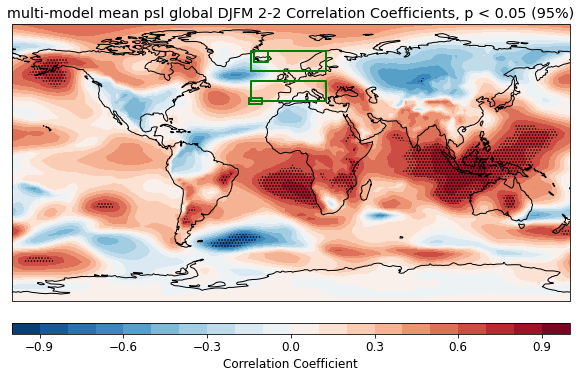

In [52]:
# Plot the correlations for the global region, year 2-2 mean, multi-model mean
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.411 to 0.601
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.426 to 0.600
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.492 to 0.588
P-values range from 0.000 to 1.000
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.331 to 0.697
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.397 to 0.575
P-values range from 0.000 to 1.000
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

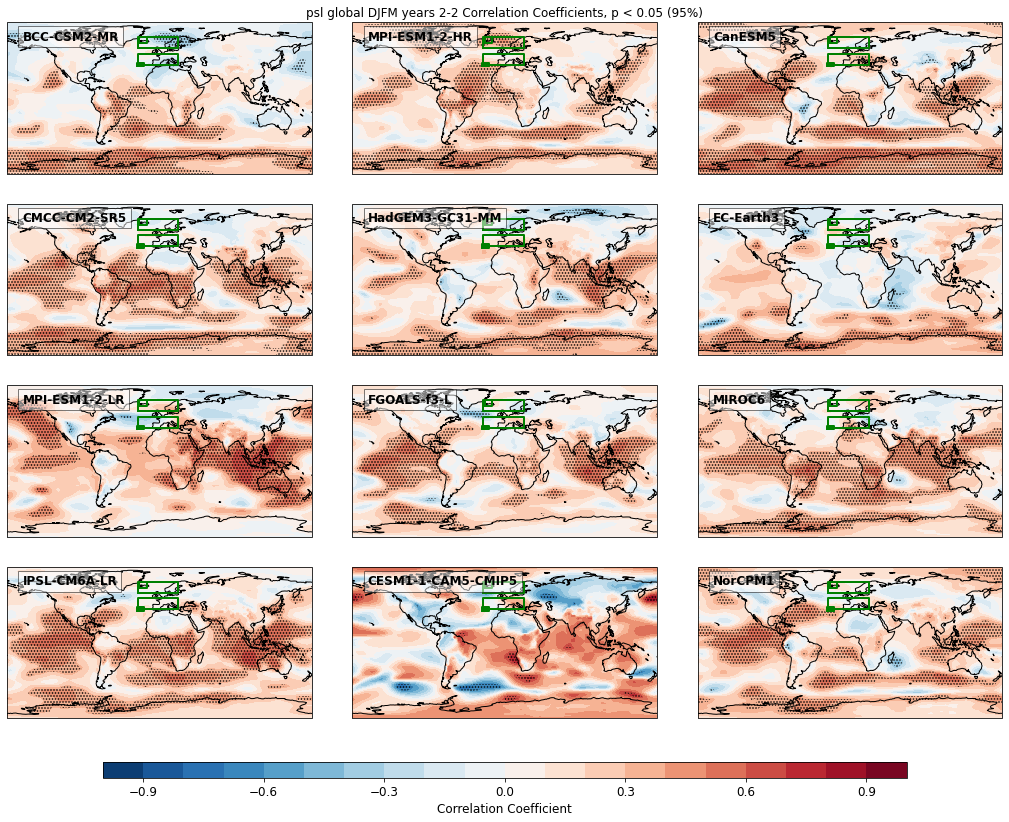

In [53]:
# Now for the individual models for the global region, years 2-2 mean
# This is for the individual models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [54]:
# Set up the parameters for the next run
# first years 2-9 SON psl
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "SON"
observations_path = dic.obs
obs_var_name = "psl"

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
                               forecast_range, season, observations_path,
                               obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 192)>
array(['1959-09-01T00:00:00.000000000', '1959-10-01T00:00:00.000000000',
       '1959-11-01T00:00:00.000000000', '1960-09-01T00:00:00.000000000',
       '1960-10-01T00:00:00.000000000', '1960-11-01T00:00:00.000000000',
       '1961-09-01T00:00:00.000000000', '1961-10-01T00:00:00.000000000',
       '1961-11-01T00:00:00.000000000', '1962-09-01T00:00:00.000000000',
       '1962-10-01T00:00:00.000000000', '1962-11-01T00:00:00.000000000',
       '1963-09-01T00:00:00.000000000', '1963-10-01T00:00:00.000000000',
       '1963-11-01T00:00:00.000000000', '1964-09-01T00:00:00.000000000',
       '1964-10-01T00:00:00.000000000', '1964-11-01T00:00:00.000000000',
       '1965-09-01T00:00:00.000000000', '1965-10-01T00:00:00.000000000',
       '1965-11-01T00:00:00.000000000', '1966-09-01T00:00:00.000000000',
       '1966-10-01T00:00:00.000000000', '1966-11-01T00:00:00.000000000',
       '1967-09-01T00:00:00

In [55]:
# Load the model data
# WATCH for month names, SON is okay in this case
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_SON-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_SON-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_SON-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_SON-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/SON/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_SON-r8i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/year

In [56]:
# calculate the r and p fields for the year 2-9 SON psl run
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.814 to 0.870
P-values range from 0.000 to 0.999


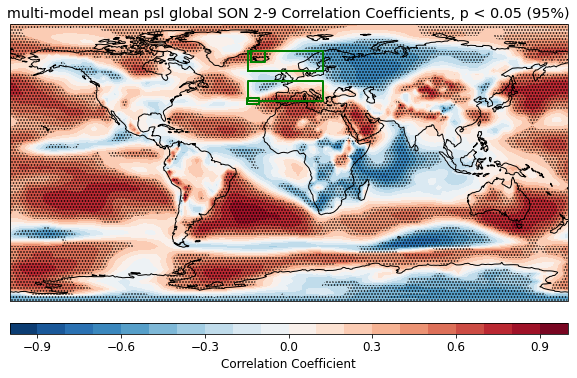

In [57]:
# Plot the correlations
# year 2-9 psl SON
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.750 to 0.818
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.688 to 0.849
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.900 to 0.863
P-values range from 0.000 to 1.000
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.744 to 0.794
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.707 to 0.861
P-values range from 0.000 to 1.000
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

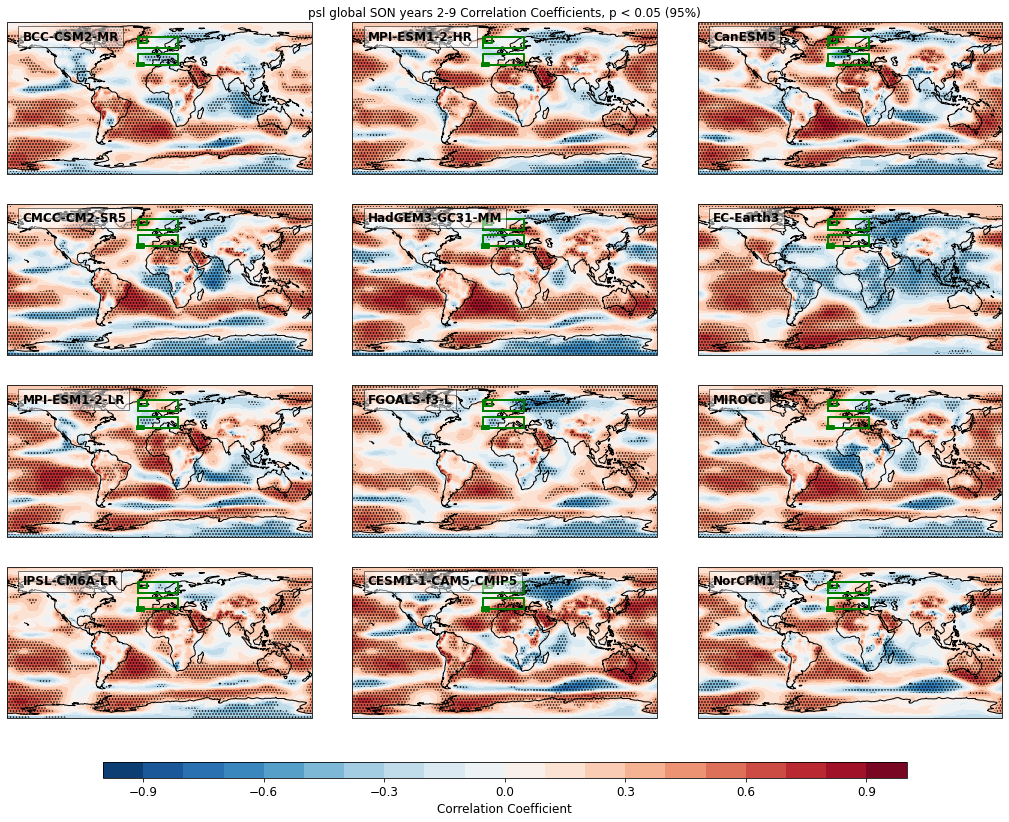

In [58]:
# Now plot the individual model correlations
# year 2-9 psl SON
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [59]:
# Set up the parameters again
# for the years 2-9 psl ULG (JJA)
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
model_season = "ULG" # weird season name for model
obs_season = "JJA" # normal season name for obs
observations_path = dic.obs
obs_var_name = "psl"


# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

File already exists
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 194)>
array(['1959-06-01T00:00:00.000000000', '1959-07-01T00:00:00.000000000',
       '1959-08-01T00:00:00.000000000', '1960-06-01T00:00:00.000000000',
       '1960-07-01T00:00:00.000000000', '1960-08-01T00:00:00.000000000',
       '1961-06-01T00:00:00.000000000', '1961-07-01T00:00:00.000000000',
       '1961-08-01T00:00:00.000000000', '1962-06-01T00:00:00.000000000',
       '1962-07-01T00:00:00.000000000', '1962-08-01T00:00:00.000000000',
       '1963-06-01T00:00:00.000000000', '1963-07-01T00:00:00.000000000',
       '1963-08-01T00:00:00.000000000', '1964-06-01T00:00:00.000000000',
       '1964-07-01T00:00:00.000000000', '1964-08-01T00:00:00.000000000',
       '1965-06-01T00:00:00.000000000', '1965-07-01T00:00:00.000000000',
       '1965-08-01T00:00:00.000000000', '1966-06-01T00:00:00.000000000',
       '1966-07-01T00:00:00.000000000', '1966-08-01T00:00:00.000000000',
       '1967-06-01T00:00:00

In [60]:
# print the time of the obs
obs.time

<xarray.DataArray 'time' (time: 65)>
array(['1959-12-31T00:00:00.000000000', '1960-12-31T00:00:00.000000000',
       '1961-12-31T00:00:00.000000000', '1962-12-31T00:00:00.000000000',
       '1963-12-31T00:00:00.000000000', '1964-12-31T00:00:00.000000000',
       '1965-12-31T00:00:00.000000000', '1966-12-31T00:00:00.000000000',
       '1967-12-31T00:00:00.000000000', '1968-12-31T00:00:00.000000000',
       '1969-12-31T00:00:00.000000000', '1970-12-31T00:00:00.000000000',
       '1971-12-31T00:00:00.000000000', '1972-12-31T00:00:00.000000000',
       '1973-12-31T00:00:00.000000000', '1974-12-31T00:00:00.000000000',
       '1975-12-31T00:00:00.000000000', '1976-12-31T00:00:00.000000000',
       '1977-12-31T00:00:00.000000000', '1978-12-31T00:00:00.000000000',
       '1979-12-31T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-12-31T00:00:00.000000000', '1982-12-31T00:00:00.000000000',
       '1983-12-31T00:00:00.000000000', '1984-12-31T00:00:00.000000000',
       '1985-12-31T00:00:00.000000000', '1986-12-31T00:00:00.000000000',
       '1987-12-31T00:00:00.000000000', '1988-12-31T00:00:00.000000000',
       '1989-12-31T00:00:00.000000000', '1990-12-31T00:00:00.000000000',
       '1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2023-12-31

In [61]:
# print the value of the obs
(obs.values[4,:,:])

array([[177.26138306, 177.26138306, 177.26138306, ..., 177.26138306,
        177.26138306, 177.26138306],
       [140.85774231, 143.97036743, 146.75193787, ..., 134.60319519,
        135.65884399, 138.141922  ],
       [184.51303101, 182.04718018, 188.38931274, ..., 172.22396851,
        180.23176575, 185.10905457],
       ...,
       [215.68684387, 209.50358582, 203.13703918, ..., 232.62011719,
        227.19628906, 221.53514099],
       [250.970047  , 246.62825012, 242.10839844, ..., 262.73370361,
        259.00323486, 255.03515625],
       [245.63021851, 243.37760925, 241.11686707, ..., 251.6181488 ,
        249.74479675, 247.73176575]])

In [62]:
# Load the model data
# using the model seasons
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_ULG-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_ULG-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_ULG-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_ULG-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/ULG/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_ULG-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/year

In [63]:
variable_data['BCC-CSM2-MR'][0].time

<xarray.DataArray 'time' (time: 54)>
array([cftime.DatetimeNoLeap(1967, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1968, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1970, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1971, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1972, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1973, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1974, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1975, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1976, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1977, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1978, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1979, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1981, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1982, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1983, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1984, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1985, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1986, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1987, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1988, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1989, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1991, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1992, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1993, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1994, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1995, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1996, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1997, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1998, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1999, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2003, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2004, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2006, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2007, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2008, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2010, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2011, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2012, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2016, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2017, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2018, 1, 15, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 1, 15, 6, 0, 0, 0, has_year_

In [64]:
# variable_data['BCC-CSM2-MR'][0,:,:].values

TypeError: list indices must be integers or slices, not tuple

In [65]:
# Calculate the r and p fields
# years 2-9 psl ULG/JJA
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
var name for obs msl
Correlation coefficients range from -0.843 to 0.944
P-values range from 0.000 to 1.000


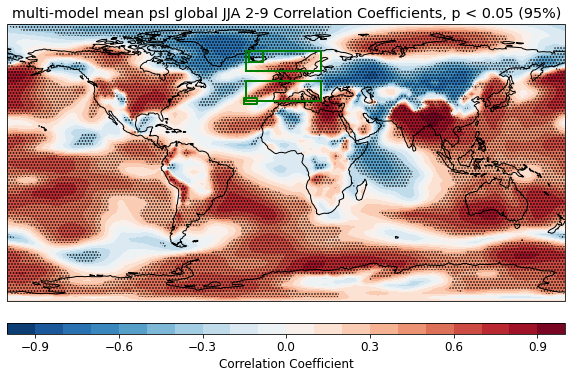

In [66]:
# Plot the spatial correlations
# Use the obs_season = JJA here as a title
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)


In [ ]:
# Now plot the individual model correlations 
# year 2-9 JJA/ULG psl
# be sure to use obs_season (JJA) here again
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.682 to 0.828
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.807 to 0.901
P-values range from 0.000 to 1.000
Processing model: CanESM5
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.918 to 0.877
P-values range from 0.000 to 1.000
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.729 to 0.924
P-values range from 0.000 to 1.000
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.859 to 0.920
P-values range from 0.000 to 0.999
Processing model: EC-Earth3
extracting data for model: EC-Earth3
var name for obs msl
Correlation coefficient

In [ ]:
# Now set up the parameters for the corrected MAY run
# year 2-9 psl MAY (MAM) - currently running
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
model_season = "MAY" # weird season name for model
obs_season = "MAM" # normal season name for obs
observations_path = dic.obs
obs_var_name = "psl"


# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# using the model seasons
# Load the data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate the r and p fields
# years 2-9 psl MAY/MAM
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, dic.models, variable
)

In [ ]:
# Plot the spatial correlations
# Use the obs_season = MAM here as a title
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)


In [ ]:
# Now plot the individual model correlations 
# year 2-9 MAM/MAY psl
# be sure to use obs_season (MAM) here again
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now we start to look at different variables
# sfcwind
# set up the parameters for the first case
variable = "sfcWind"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "DJFM" # normal season name for obs
observations_path = dic.obs
obs_var_name = "sfcWind"
models = dic.sfcWind_models

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-9 DJFM
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-9 DJFM sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-9 DJFM sfcwind
# make sure models, not dic.models is being used
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# now plot the individual model correlations
# for year 2-9 DJFM sfcwind
# make sure that models, not dic.models are being used
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now modify the variables for the next sfcwind run
# years 2-9 ULG (JJA) sfcwind
# only need to modify obs_season and model_season
obs_season = "JJA"
model_season = "ULG"

# Process the observations using the obs season
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-9 ULG
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-9 ULG sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-9 ULG sfcwind
# make sure models, not dic.models is being used
# use obs_season (JJA) not season or model_season (ULG) in this case
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # now plot the individual model correlations
# for year 2-9 ULG sfcwind
# make sure that models, not dic.models are being used
# use obs_season (JJA) not season or model_season (ULG) in this case
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# now sfcwind year 2-9 for SON
# only need to modify the season
season = "SON"

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-9 SON
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-9 SON sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-9 SON sfcwind
# make sure models, not dic.models is being used
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# now plot the individual model correlations
# for year 2-9 SON sfcwind
# make sure that models, not dic.models are being used
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now just for MAY
obs_season = "MAM"
model_season = "MAY"

# Process the observations using the obs season
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-9 MAY
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-9 MAY sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-9 MAY sfcwind
# make sure models, not dic.models is being used
# use obs_season (MAM) not season or model_season (MAY) in this case
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # now plot the individual model correlations
# for year 2-9 MAY sfcwind
# make sure that models, not dic.models are being used
# use obs_season (MAM) not season or model_season (MAY) in this case
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the year 2-2 runs
# begin with sfcwind year 2-2 DJFM
variable = "sfcWind"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-2"
season = "DJFM" # normal season name for obs
observations_path = dic.obs
obs_var_name = "sfcWind"
models = dic.sfcWind_models

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-2 DJFM
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-2 DJFM sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-2 DJFM sfcwind
# make sure models, not dic.models is being used
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# now plot the individual model correlations
# for year 2-2 DJFM sfcwind
# make sure that models, not dic.models are being used
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for year 2-2 ULG
# reset the obs_season and model_season
obs_season = "JJA"
model_season = "ULG"

# Process the observations using the obs season
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, obs_season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# sfcwind 2-2 ULG
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, model_season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
obs.time

In [ ]:
obs.values[0]

In [ ]:
variable_data['BCC-CSM2-MR'][0].time

In [ ]:
variable_data['BCC-CSM2-MR'][0].values

In [ ]:
# Calculate r and p fields for year 2-2 ULG sfcwind run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-2 ULG sfcwind
# make sure models, not dic.models is being used
# use obs_season (JJA) not season or model_season (ULG) in this case
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, obs_season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # now plot the individual model correlations
# for year 2-2 ULG sfcwind
# make sure that models, not dic.models are being used
# use obs_season (JJA) not season or model_season (ULG) in this case
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, obs_season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Reset the params for the tas runs
#---------------------------------
variable = "tas"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "DJFM" # normal season name for obs
observations_path = dic.obs
obs_var_name = "tas"
models = dic.tas_models

# Process the observations
obs = fnc.process_observations(variable, region, region_grid,
    forecast_range, season, observations_path,
    obs_var_name)

In [ ]:
# Load the model data
# tas 2-9 DJFM
# make sure to use models not dic.models
datasets = fnc.load_data(dic.base_dir, models, variable, 
                         region, forecast_range, season)

# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Calculate r and p fields for year 2-9 DJFM tas run
# make sure to use models and not dic.models
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
    obs, variable_data, models, variable
)

In [ ]:
# Plot the multi-model mean correlations
# for year 2-9 DJFM tas
# make sure models, not dic.models is being used
fnc.plot_correlations(models, rfield, pfield, obs, variable, region, season,
                      forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
                      dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# now plot the individual model correlations
# for year 2-9 DJFM tas
# make sure that models, not dic.models are being used
fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, season,
                                forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
                                  dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # now for the running tas run
# obs_season = "JJA"
# model_season = "ULG"

# # Process the observations using the obs season
# obs = fnc.process_observations(variable, region, region_grid,
#     forecast_range, obs_season, observations_path,
#     obs_var_name)

In [ ]:
# # Load the model data
# # tas 2-9 ULG
# # make sure to use models not dic.models
# datasets = fnc.load_data(dic.base_dir, models, variable, 
#                          region, forecast_range, model_season)

# # Process the model data
# variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# # Calculate r and p fields for year 2-9 ULG tas run
# # make sure to use models and not dic.models
# rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(
#     obs, variable_data, models, variable
# )

In [ ]:
# # Plot the multi-model mean correlations
# # for year 2-9 ULG tas
# # make sure models, not dic.models is being used
# # use obs_season (JJA) not season or model_season (ULG) in this case
# fnc.plot_correlations(models, rfield, pfield, obs, variable, region, obs_season,
#                       forecast_range, dic.plots_dir, obs_lons_converted, lons_converted,
#                       dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# # # now plot the individual model correlations
# # for year 2-9 ULG tas
# # make sure that models, not dic.models are being used
# # use obs_season (JJA) not season or model_season (ULG) in this case
# fnc.plot_correlations_subplots(models, obs, variable_data, variable, region, obs_season,
#                                 forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid,
#                                   dic.uk_n_box, dic.uk_s_box)